In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('coverage_summary.csv')
data.head()

,Function,Noise,N_Train,N_Tree,Coverage_Mean,Coverage_SD
0,func_cos_p2,normal,25,20,0.557395,0.166374
1,func_cos_p2,normal,25,50,0.490730,0.160143
2,func_cos_p2,normal,25,100,0.492435,0.131154
3,func_cos_p2,normal,25,150,0.492895,0.108208
4,func_cos_p2,normal,25,200,0.480190,0.101517


In [24]:
data_melt = pd.melt(data, id_vars=['Function', 'Noise', 'N_Train', 'N_Tree'],
                    value_vars=['Coverage_Mean'],
                    var_name='type', value_name='pct')
# select only noise = normal / t
data_melt = data_melt[(data_melt['Noise'] == 'normal') | (data_melt['Noise'] == 't')]
data_melt.head()

,Function,Noise,N_Train,N_Tree,type,pct
0,func_cos_p2,normal,25,20,Coverage_Mean,0.557395
1,func_cos_p2,normal,25,50,Coverage_Mean,0.490730
2,func_cos_p2,normal,25,100,Coverage_Mean,0.492435
3,func_cos_p2,normal,25,150,Coverage_Mean,0.492895
4,func_cos_p2,normal,25,200,Coverage_Mean,0.480190


In [25]:
data_melt['Function'] = data_melt['Function'].apply(lambda x: x.replace('func_', '').split('_p')[0])
data_melt['pct'] = data_melt['pct'] * 100

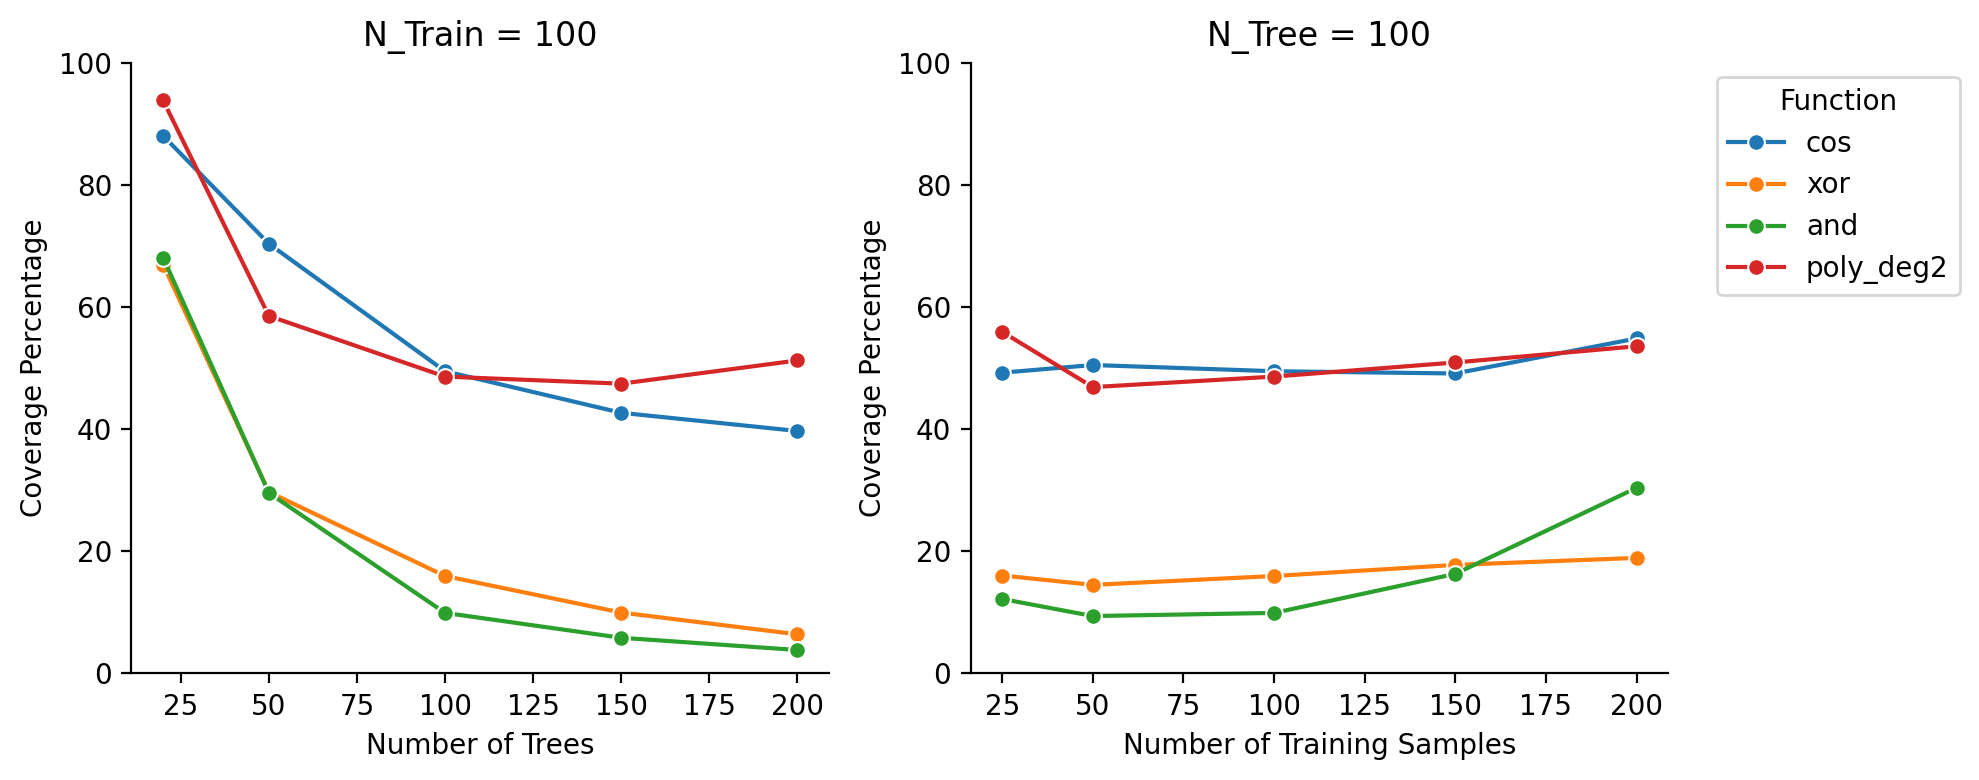

In [26]:
noise_normal_ntrain100 = data_melt[(data_melt['Noise'] == 'normal') & (data_melt['type'] == 'Coverage_Mean') & (data_melt['N_Train'] == 100)]
noise_normal_ntree100 = data_melt[(data_melt['Noise'] == 'normal') & (data_melt['type'] == 'Coverage_Mean') & (data_melt['N_Tree'] == 100)]

# plotting two side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi =200)
sns.lineplot(data=noise_normal_ntrain100, x='N_Tree', y='pct', hue='Function', ax=axes[0], marker ='o')
sns.lineplot(data=noise_normal_ntree100, x='N_Train', y='pct', hue='Function', ax=axes[1], marker ='o')
axes[0].set_title('N_Train = 100')
axes[1].set_title('N_Tree = 100')
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)
axes[0].set_ylabel('Coverage Percentage')
axes[1].set_ylabel('Coverage Percentage')
axes[0].set_xlabel('Number of Trees')
axes[1].set_xlabel('Number of Training Samples')
# ax0 no legend
axes[0].legend_.remove()
# ax1 legend on the right
axes[1].legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# despline
sns.despine(ax=axes[0], top=True, right=True)
sns.despine(ax=axes[1], top=True, right=True)
plt.tight_layout()
# suptitle finite
plt.show()